# Final visualizations for the dissertations

## Objective

## Steps

## 1. File with information about ICO

In [1]:
import pandas as pd
import os
import re
import pytz
from datetime import datetime, timedelta
import plotly.graph_objects as go


In [2]:
df_info = pd.read_csv('lista_ico_2020-08-17_tab3.csv', sep=';')

In [3]:
df_info.head()

ico                                      adress  fraud  start_date  \
0          0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  08/11/2017   
1        AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  18/12/2017   
2  AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0  14/06/2019   
3        ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0  21/02/2019   
4      BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0  06/10/2017   

  market_start_date  diff_days  market_days size_ok price_zero  Market Cap  \
0        15/08/2017          4         1140     NaN        NaN        45.0   
1        21/12/2017          3         1012     NaN        NaN       154.0   
2        27/06/2019         13          459     NaN        NaN        47.0   
3        03/05/2019         12          573     NaN        NaN       170.0   
4        06/12/2017          2         1204     NaN        NaN        61.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    02/11/2018  NaN  NaN   
1        x              13        10         0    19/06/2018  NaN  NaN   
2        x               3         4        20    24/12/2019  NaN  NaN   
3        x              11         7        41    09/01/2019  NaN  NaN   
4        x               2        11         7    12/09/2017  NaN  NaN   

  social_media  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

## 3. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio


In [4]:
from dict_ico_array_length_20 import dict_ico_len_20

## 3. Load data from .py file
For each key inside the dictionary, the arrays correspond to the following series:

0. array_daily_transactions
1. array_perc_new_holders
2. array_biggest_holder
3. array_newbiers
4. array_gas_ratio


## 4. Filter data for size equals to 20

In [6]:
dict_perc_transactions_20 = {k:v[0] for k,v in dict_ico_len_20.items() if len(v[0]) == 20}
dict_perc_new_holders_20 = {k:v[1] for k,v in dict_ico_len_20.items() if len(v[1]) == 20}
dict_perc_big_holder_20 = {k:v[2] for k,v in dict_ico_len_20.items() if len(v[2]) == 20}
dict_perc_newbiers_20 = {k:v[3] for k,v in dict_ico_len_20.items() if len(v[3]) == 20}
dict_gas_ratio = {k:v[4] for k,v in dict_ico_len_20.items() if len(v[4]) == 20}

In [7]:
df_transactions_20 = pd.DataFrame(dict_perc_transactions_20).T
df_new_holders_20 = pd.DataFrame(dict_perc_new_holders_20).T
df_big_holder_20 = pd.DataFrame(dict_perc_big_holder_20).T
df_newbiers_20 = pd.DataFrame(dict_perc_newbiers_20).T
df_gasratio_20 = pd.DataFrame(dict_gas_ratio).T

In [8]:
print(df_transactions_20.shape)
print(df_new_holders_20.shape)
print(df_big_holder_20.shape)
print(df_newbiers_20.shape)
print(df_gasratio_20.shape)

(222, 20)
(233, 20)
(233, 20)
(234, 20)
(219, 20)


## 5. Plotting the dataset

In [9]:
import plotly.express as px

In [10]:
df_info.head()

ico                                      adress  fraud  start_date  \
0          0X  0xe41d2489571d322189246dafa5ebde1f4699f498      0  08/11/2017   
1        AELF  0xbf2179859fc6d5bee9bf9158632dc51678a4100e      0  18/12/2017   
2  AMPLEFORTH  0xd46ba6d942050d489dbd938a2c909a5d5039a161      0  14/06/2019   
3        ANKR  0x8290333cef9e6d528dd5618fb97a76f268f3edd4      0  21/02/2019   
4      BANCOR  0x1f573d6fb3f13d689ff844b4ce37794d79a7ff1c      0  06/10/2017   

  market_start_date  diff_days  market_days size_ok price_zero  Market Cap  \
0        15/08/2017          4         1140     NaN        NaN        45.0   
1        21/12/2017          3         1012     NaN        NaN       154.0   
2        27/06/2019         13          459     NaN        NaN        47.0   
3        03/05/2019         12          573     NaN        NaN       170.0   
4        06/12/2017          2         1204     NaN        NaN        61.0   

  o_concur  biggest_holder  exchange  contract date_analysis code site  \
0        x               2         6        14    02/11/2018  NaN  NaN   
1        x              13        10         0    19/06/2018  NaN  NaN   
2        x               3         4        20    24/12/2019  NaN  NaN   
3        x              11         7        41    09/01/2019  NaN  NaN   
4        x               2        11         7    12/09/2017  NaN  NaN   

  social_media  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

### Transactions

In [11]:
df_transactions_20_with_fraud = df_transactions_20.merge(df_info[['ico', 'fraud']], left_index=True, right_on='ico')

In [13]:
df_transactions_20_with_fraud.set_index('ico', inplace=True)

In [14]:
df_transactions_20.head()

0       1       2       3       4       5       6       7  \
0X       0.1956  0.3770  0.4623  0.5442  0.6657  0.7008  0.7290  0.7516   
0XCERT   0.3247  0.5239  0.5726  0.6013  0.6189  0.6950  0.7302  0.7687   
4NEW     0.4522  0.7306  0.7621  0.7935  0.8107  0.8212  0.8290  0.8438   
ABULABA  0.5221  0.5603  0.5771  0.6214  0.6351  0.6473  0.6611  0.6687   
AELF     0.0534  0.0648  0.0724  0.0815  0.0917  0.1060  0.1203  0.1311   

              8       9      10      11      12      13      14      15  \
0X       0.7791  0.8006  0.8222  0.8474  0.8613  0.8826  0.9020  0.9259   
0XCERT   0.7835  0.8190  0.8739  0.8847  0.9093  0.9337  0.9522  0.9618   
4NEW     0.8619  0.8722  0.8813  0.9018  0.9134  0.9293  0.9379  0.9512   
ABULABA  0.7160  0.7420  0.7664  0.7893  0.8000  0.8534  0.8824  0.8870   
AELF     0.1421  0.1534  0.1626  0.1727  0.1862  0.2044  0.2358  0.9036   

             16      17      18   19  
0X       0.9460  0.9691  0.9861  1.0  
0XCERT   0.9713  0.9769  0.9858  1.0  
4NEW     0.9698  0.9790  0.9934  1.0  
ABULABA  0.9115  0.9405  0.9695  1.0  
AELF     0.9231  0.9591  0.9810  1.0

In [15]:
df_transactions_20.loc['fraud_mean'] = df_transactions_20_with_fraud[df_transactions_20_with_fraud.fraud == 1].iloc[:, :-2].mean(axis=0)
df_transactions_20.loc['success_mean'] = df_transactions_20_with_fraud[df_transactions_20_with_fraud.fraud == 0].iloc[:, :-2].mean(axis=0)

In [16]:
df_transactions_20.tail()

0         1         2         3         4         5  \
ZILLIQA       0.037700  0.238500  0.387100  0.445700  0.488400  0.529700   
ZPAY          0.414400  0.415400  0.468300  0.469200  0.497800  0.506600   
ZYNECOIN      0.468200  0.879000  0.885400  0.894900  0.894900  0.894900   
fraud_mean    0.377122  0.493214  0.555938  0.607042  0.640352  0.674916   
success_mean  0.292686  0.408896  0.471633  0.506342  0.537139  0.561799   

                     6         7         8         9        10        11  \
ZILLIQA       0.564600  0.591600  0.625500  0.674300  0.712700  0.744000   
ZPAY          0.512200  0.514200  0.515800  0.516700  0.524500  0.524600   
ZYNECOIN      0.939500  0.949000  0.949000  0.949000  0.971300  0.974500   
fraud_mean    0.698601  0.720670  0.744849  0.768079  0.796061  0.817910   
success_mean  0.587609  0.630026  0.666604  0.696212  0.720774  0.755224   

                    12        13        14        15        16        17  \
ZILLIQA       0.777600  0.816200  0.852400  0.874100  0.900800  0.943000   
ZPAY          0.525400  0.526100  0.527100  0.527700  0.533800  0.998400   
ZYNECOIN      0.974500  0.980900  0.984100  0.987300  0.987300  0.990400   
fraud_mean    0.843346  0.864118  0.890172  0.918758  0.939634  0.961506   
success_mean  0.780500  0.805413  0.842218  0.871533  0.899862  0.930740   

                    18   19  
ZILLIQA       0.974600  1.0  
ZPAY          0.999400  1.0  
ZYNECOIN      0.990400  1.0  
fraud_mean    0.979743  NaN  
success_mean  0.969839  NaN

In [19]:
df_transactions_20_t = df_transactions_20.T
df_transactions_20_t.head()

0X  0XCERT    4NEW  ABULABA    AELF   AERGO  AIRSWAP  AKROPOLIS  \
0  0.1956  0.3247  0.4522   0.5221  0.0534  0.0762   0.2881     0.5163   
1  0.3770  0.5239  0.7306   0.5603  0.0648  0.1430   0.3863     0.6179   
2  0.4623  0.5726  0.7621   0.5771  0.0724  0.4038   0.3882     0.6533   
3  0.5442  0.6013  0.7935   0.6214  0.0815  0.4792   0.3894     0.7195   
4  0.6657  0.6189  0.8107   0.6351  0.0917  0.5101   0.3904     0.7383   

   AMPLEFORTH  ANATOMIA  ...    VITE  WALTONCHAIN  WANCHAIN     WAX  \
0      0.3922    0.2717  ...  0.2377       0.4455    0.3089  0.0792   
1      0.5640    0.4528  ...  0.4119       0.4532    0.4572  0.1173   
2      0.6094    0.5855  ...  0.4781       0.4648    0.5104  0.1654   
3      0.6409    0.6905  ...  0.5469       0.5174    0.5857  0.2933   
4      0.6692    0.7741  ...  0.5934       0.6048    0.6222  0.3400   

   WAYKICHAIN  ZILLIQA    ZPAY  ZYNECOIN  fraud_mean  success_mean  
0      0.0618   0.0377  0.4144    0.4682    0.377122      0.292686  
1      0.3008   0.2385  0.4154    0.8790    0.493214      0.408896  
2      0.5758   0.3871  0.4683    0.8854    0.555938      0.471633  
3      0.6285   0.4457  0.4692    0.8949    0.607042      0.506342  
4      0.6589   0.4884  0.4978    0.8949    0.640352      0.537139  

[5 rows x 224 columns]

In [23]:
fraud_dict = {1: 'fraud', 0:'success'}
color_dict = {1: 'rgba(152, 0, 0, .1)', 0: 'rgba(0,0,255,.1)'}

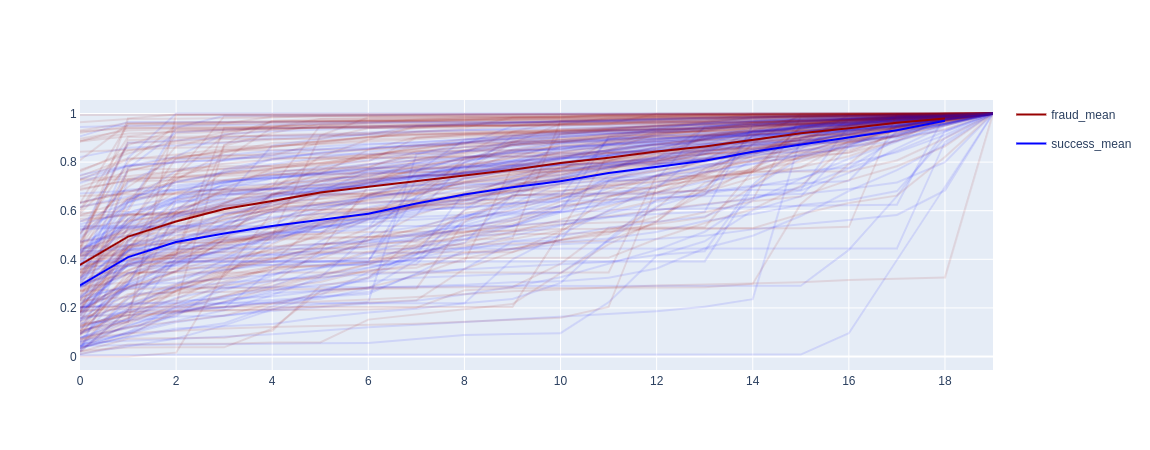

In [25]:
fig = go.Figure()
for ico in df_transactions_20_t.columns[:-2]:
    is_fraud = df_info.loc[df_info.ico ==ico]['fraud'].values[0]
    fig.add_trace(go.Scatter(x=df_transactions_20_t.index.values, y=df_transactions_20_t[ico], #opacity=0.2,
                            showlegend=False,
                            legendgroup = fraud_dict.get(is_fraud),
                            marker_color=color_dict.get(is_fraud)))
fig.add_trace(go.Scatter(x=df_transactions_20_t.index.values, y=df_transactions_20_t['fraud_mean'], #opacity=0.2,
                            name='fraud_mean',
                            legendgroup ='fraud',
                            marker_color='rgba(152, 0, 0, 1.)',
                         showlegend=True             
             ))

fig.add_trace(go.Scatter(x=df_transactions_20_t.index.values, y=df_transactions_20_t['success_mean'], #opacity=0.2,
                            name='success_mean',
                            legendgroup ='success',
                            marker_color='rgba(0,0,255,1.0)',
                         showlegend=True             
             ))
                         
fig.show()


In [16]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')
df_series_stack

ico  days  series  fraud
0           0X     0  0.1956      0
1           0X     1  0.3770      0
2           0X     2  0.4623      0
3           0X     3  0.5442      0
4           0X     4  0.6657      0
...        ...   ...     ...    ...
4213  ZYNECOIN    14  0.9841      1
4214  ZYNECOIN    15  0.9873      1
4215  ZYNECOIN    16  0.9873      1
4216  ZYNECOIN    17  0.9904      1
4217  ZYNECOIN    18  0.9904      1

[4218 rows x 4 columns]

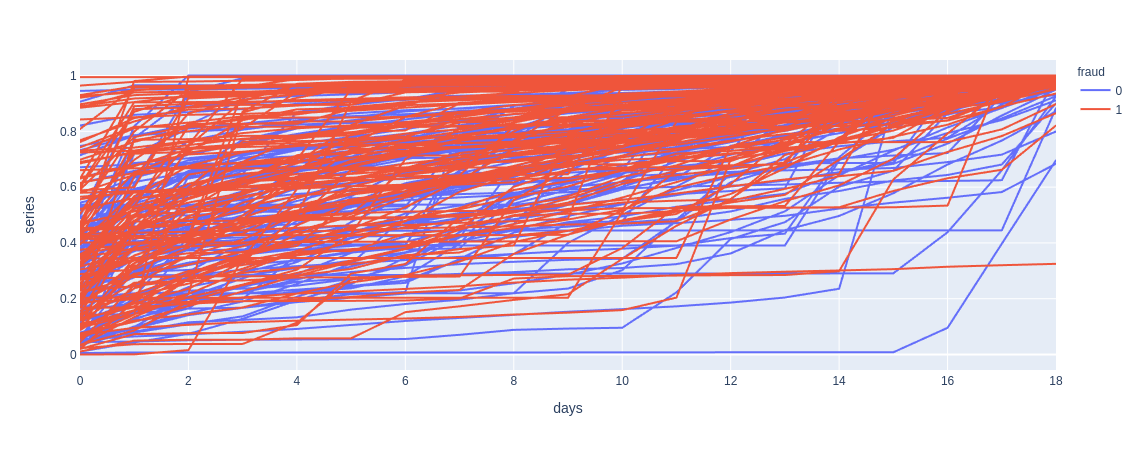

In [17]:
fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### New holders

In [44]:
df_series_stack = pd.DataFrame(df_new_holders_20.iloc[:, :-1].stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [45]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.2656
1      0X     1  0.4122
2      0X     2  0.4955
3      0X     3  0.5804
4      0X     4  0.6876

In [46]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

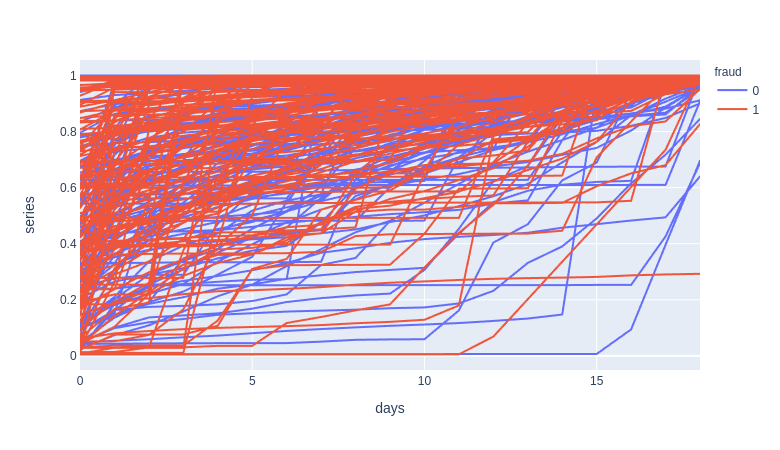

In [47]:


df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Biggest Holder

In [78]:
df_series_stack = pd.DataFrame(df_big_holder_20.stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [79]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.2139
1      0X     1  0.0322
2      0X     2  0.0322
3      0X     3  0.0360
4      0X     4  0.0332

In [80]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

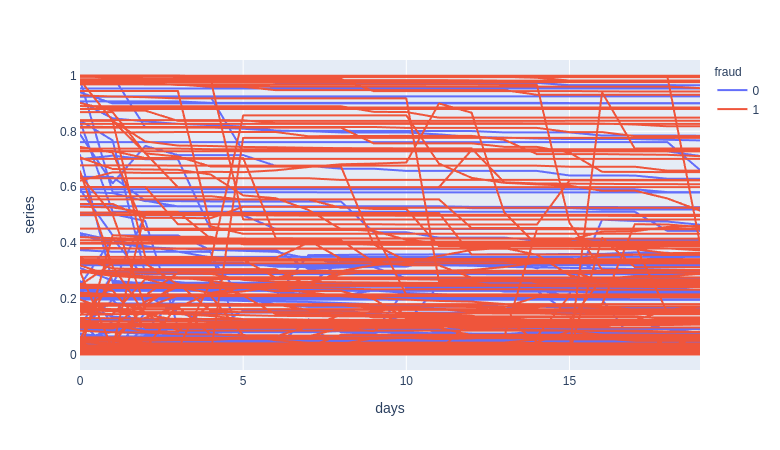

In [81]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Newbiers

In [74]:
df_series_stack = pd.DataFrame(df_newbiers_20.stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [75]:
df_series_stack.head()

level_0  days  series
0      0X     0  0.6861
1      0X     1  0.4269
2      0X     2  0.4521
3      0X     3  0.2303
4      0X     4  0.2735

In [76]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

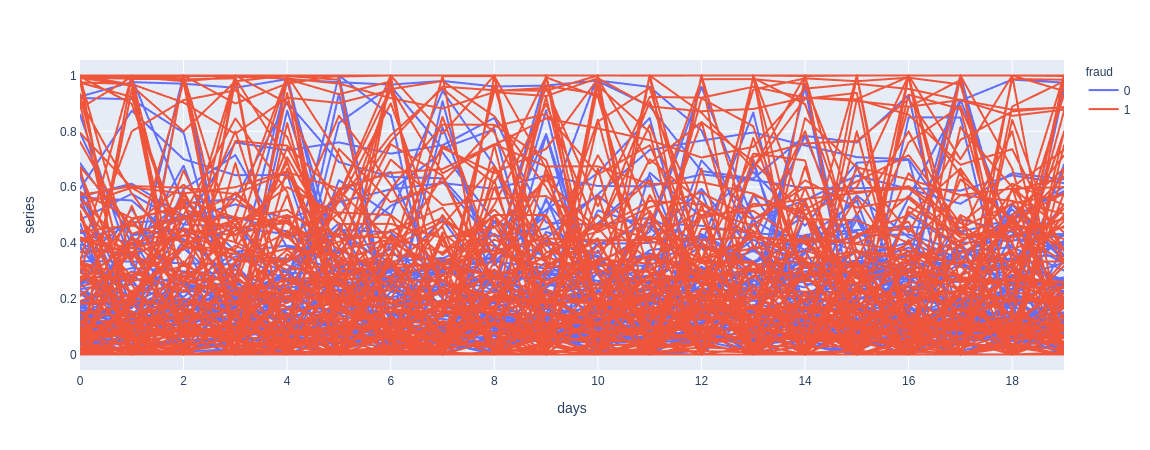

In [77]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()

### Gas ratio

In [66]:
df_gasratio_20.shape

(219, 20)

In [70]:
df_series_stack = pd.DataFrame(df_gasratio_20.stack()).reset_index().rename(columns={'level_1':'days', 0: 'series'})

In [71]:
df_series_stack.rename(columns={'level_0':'ico'},inplace=True)

In [72]:
df_series_stack

ico  days  series
0           0X     0  0.5764
1           0X     1  0.2346
2           0X     2  0.2659
3           0X     3  0.3010
4           0X     4  0.2935
...        ...   ...     ...
4375  ZYNECOIN    15  1.0000
4376  ZYNECOIN    16  0.0000
4377  ZYNECOIN    17  0.0000
4378  ZYNECOIN    18  0.0000
4379  ZYNECOIN    19  1.0000

[4380 rows x 3 columns]

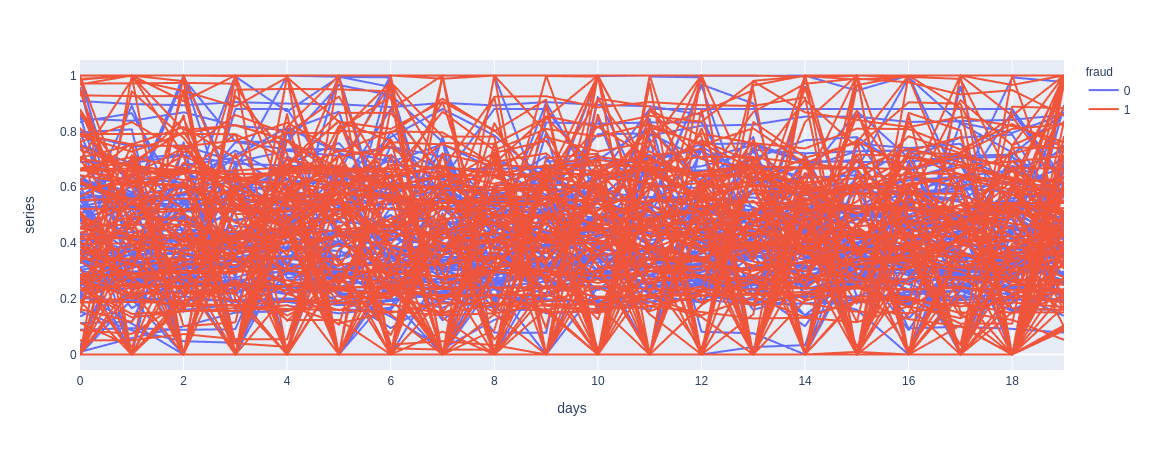

In [73]:
df_series_stack = df_series_stack.merge(df_info[['ico','fraud']], on='ico')

fig = px.line(df_series_stack, x="days", y="series", color="fraud",
              line_group="ico", hover_name="ico")
fig.show()